# Problem Statement: Life Insurance Data
## The dataset belongs to a leading life insurance company.The company wants to predict the bonus for its agents so that itmay design appropriate engagement activity for their high performing agents and upskill programsfor low performing agents

# 1. Problem Understanding

# 2. Data Report

a) Understanding how data was collected in terms of time, frequency and methodology 

b) Visual inspection of data (rows, columns, descriptive details) 

c) Understanding of attributes (variable info, renaming if required)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import statistics as st
os.getcwd()
import scipy.stats as stats
from scipy.stats.mstats import mquantiles
from scipy.stats import iqr
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import kurtosis

In [2]:
import os
os.getcwd()

'C:\\Users\\HP\\Desktop\\Austing GL\\CAPSTONE PROJECT'

In [3]:
dfog = pd.read_excel("C:\\Users\\HP\\Desktop\\Austing GL\\CAPSTONE PROJECT\\Sales.xlsx",sheet_name="Sales")

In [4]:
data_dict= pd.read_excel("C:\\Users\\HP\\Desktop\\Austing GL\\CAPSTONE PROJECT\\Sales.xlsx",sheet_name="Data Dict")

In [5]:
data_dict.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,Sales,CustID,Unique customer ID
2,NaN,Sales,AgentBonus,Bonus amount given to each agents in last month
3,NaN,Sales,Age,Age of customer
4,NaN,Sales,CustTenure,Tenure of customer in organization


In [6]:
data_dict.rename(columns=data_dict.iloc[0], inplace = True)

In [7]:
data_dict.rename(columns = {'Discerption' : 'Description'}, inplace = True)
data_dict_fin=data_dict.iloc[1:,1:]
# DATA DICTIONARY:
pd. set_option('display.max_colwidth', None)
data_dict_fin

,Data,Variable,Description
1,Sales,CustID,Unique customer ID
2,Sales,AgentBonus,Bonus amount given to each agents in last month
3,Sales,Age,Age of customer
4,Sales,CustTenure,Tenure of customer in organization
5,Sales,Channel,Channel through which acquisition of customer is done
6,Sales,Occupation,Occupation of customer
7,Sales,EducationField,Field of education of customer
8,Sales,Gender,Gender of customer
9,Sales,ExistingProdType,Existing product type of customer
10,Sales,Designation,Designation of customer in their organization


In [8]:
df=dfog.copy()

In [9]:
# CHECKING IF DATA IS LOADED CORRECTLY
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [10]:
df.tail()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0
4519,7004519,4764,14.0,10.0,Agent,Salaried,Under Graduate,Female,5,Manager,2.0,Married,23820.0,0,3.0,700308.0,North,Half Yearly,1,3.0


In [11]:
# SHAPE

df.shape

(4520, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [13]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [14]:
df.isnull().sum().sum()

1166

In [15]:
df.isnull().sum().sum()/ df.size*100

1.2898230088495575

In [16]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,4520.0,NaN,NaN,NaN,7002259.5,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,NaN,NaN,NaN,4077.838274,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,NaN,NaN,NaN,14.494707,9.037629,2.0,7.0,13.0,20.0,58.0
CustTenure,4294.0,NaN,NaN,NaN,14.469027,8.963671,2.0,7.0,13.0,20.0,57.0
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520.0,NaN,NaN,NaN,3.688938,1.015769,1.0,3.0,4.0,4.0,6.0
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


In [18]:
categorical_features=[]
numerical_features=[]
for i in df.columns:
    if df[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [19]:
numerical_features

['CustID',
 'AgentBonus',
 'Age',
 'CustTenure',
 'ExistingProdType',
 'NumberOfPolicy',
 'MonthlyIncome',
 'Complaint',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore']

In [20]:
categorical_features

['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus',
 'Zone',
 'PaymentMethod']

In [21]:
df.duplicated().any()

False

In [22]:
mquantiles((df["AgentBonus"]))[0]

3027.45

### FOR GENDER:

In [23]:
df["Gender"].value_counts()

Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64

In [24]:
df["Gender"]= df["Gender"].replace("Fe male", "Female")

In [25]:
df["Gender"].value_counts()

Male      2688
Female    1832
Name: Gender, dtype: int64

### For Designation:

In [26]:
df["Designation"].value_counts()

Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64

In [27]:
df["Designation"]= df["Designation"].replace("Exe", "Executive")

In [28]:
df["Designation"].value_counts()

Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64

### For Education:

In [29]:
df["EducationField"].value_counts()

Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64

In [30]:
df["EducationField"]= df["EducationField"].replace("UG", "Under Graduate")

In [31]:
df["EducationField"].value_counts()

Graduate          1870
Under Graduate    1420
Diploma            496
Engineer           408
Post Graduate      252
MBA                 74
Name: EducationField, dtype: int64

# 3. Exploratory Data Analysis

## a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

Non Visual Univariate Analysis for Numeric Data:

In [32]:
#DEEPER DIVE INTO DESCRIPTION:

def zero_count(_series):
    counter=0
    for val in _series:
        if val==0:
            counter+=1
    return counter 

def negative_count(_series):
    counter=0
    for val in _series:
        if val < 0:
            counter+=1
    return counter 

stat_list = ['TOTAL RECORDS',
 'NULL COUNT',
 'ZERO COUNT',
 'NEGATIVE COUNT',
 'MIN',
 'MAX',
 'RANGE',
 'MEAN',
 'MEDIAN',
 'MODE',
 'VARIANCE',
 'STD DEV',
 'Q1',
 'Q3',
 'IQR',
 'SKEWNESS',
 'KURTOSIS']

def stat_function(_series):
    return [round(val,2) for val in 
          [len(_series),
           _series.isna().sum(),
           zero_count(_series),
           negative_count(_series),
           min(_series),
           max(_series),
           max(_series)-min(_series),
           _series.mean(),
           _series.median(),
           _series.mode()[0],
           _series.var(),
           _series.std(),
           mquantiles((_series))[0],
           mquantiles((_series))[2],
           mquantiles((_series))[2]-mquantiles((_series))[0],
           (_series).skew(),
           (_series).kurt()]
          ]

def stat_df(data, feature_list):
    stat_dictionary = {}
    for x in feature_list:
        stat_dictionary[x] = stat_function(data[x])
    return pd.DataFrame(stat_dictionary, index = stat_list).T

additional_desc=round(stat_df(df, df._get_numeric_data()),2)

In [33]:
additional_desc.drop(columns=["MEAN","MEDIAN","MODE","TOTAL RECORDS","Q1","Q3","STD DEV"])

,NULL COUNT,ZERO COUNT,NEGATIVE COUNT,MIN,MAX,RANGE,VARIANCE,IQR,SKEWNESS,KURTOSIS
CustID,0.0,0.0,0.0,7000000.0,7004519.0,4519.0,1.702910e+06,2260.10,0.00,-1.20
AgentBonus,0.0,0.0,0.0,1605.0,9608.0,8003.0,1.969312e+06,1840.10,0.82,0.71
Age,269.0,0.0,0.0,2.0,58.0,56.0,8.168000e+01,14.00,0.94,0.84
CustTenure,226.0,0.0,0.0,2.0,57.0,55.0,8.035000e+01,13.00,0.93,0.85
ExistingProdType,0.0,0.0,0.0,1.0,6.0,5.0,1.030000e+00,1.00,-0.40,0.60
NumberOfPolicy,45.0,0.0,0.0,1.0,6.0,5.0,2.120000e+00,3.00,-0.10,-0.89
MonthlyIncome,236.0,0.0,0.0,16009.0,38456.0,22447.0,2.386909e+07,5433.75,1.36,1.58
Complaint,0.0,3222.0,0.0,0.0,1.0,1.0,2.000000e-01,1.00,0.94,-1.11
ExistingPolicyTenure,184.0,0.0,0.0,1.0,25.0,24.0,1.120000e+01,4.00,1.54,2.75
SumAssured,154.0,0.0,0.0,168536.0,1838496.0,1669960.0,6.063159e+10,339618.60,0.97,1.25


### Visual Univariate:

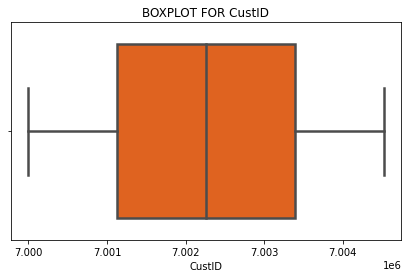

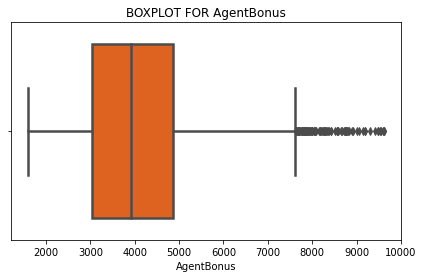

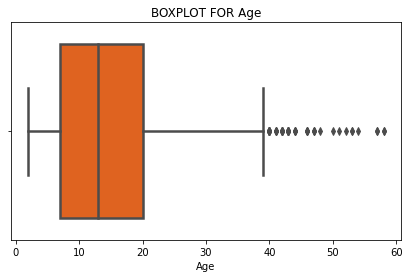

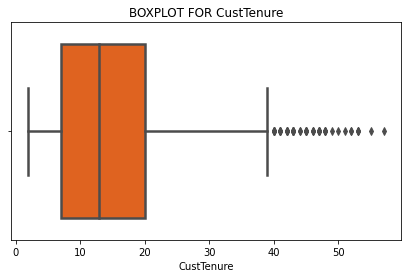

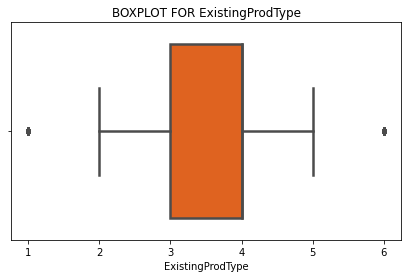

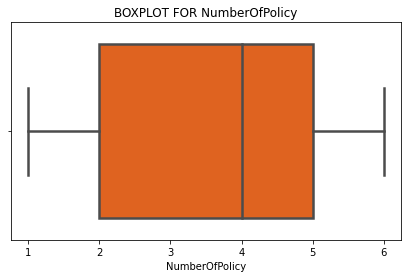

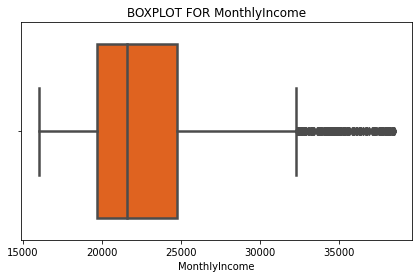

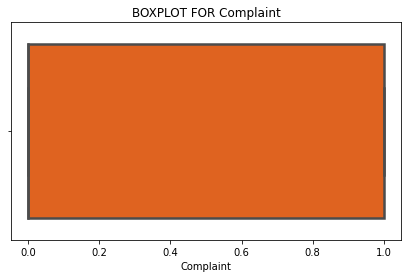

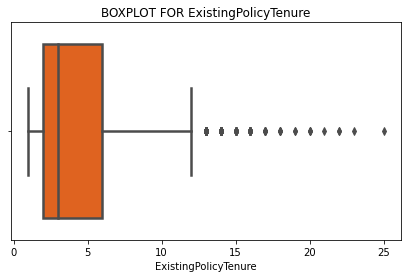

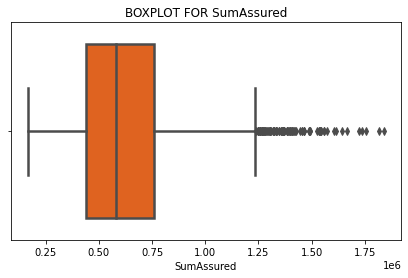

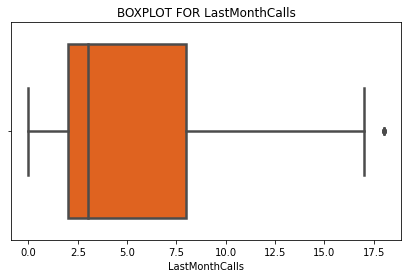

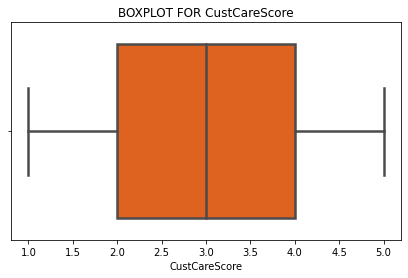

In [34]:
# Function definition for plotting the graphs
def plot_boxplot(data, feature_list):
    for n in feature_list:
        plt.figure(figsize=(7,4));
        sns.boxplot(data[n],palette='hot_r', linewidth=2.5);
        plt.title("BOXPLOT FOR {}".format(n));
        
plot_boxplot(df[numerical_features], numerical_features)

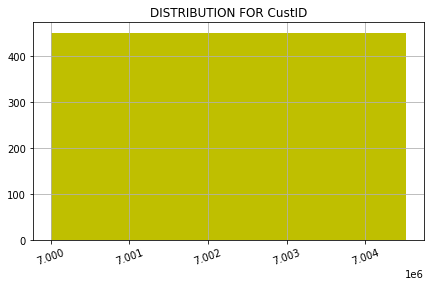

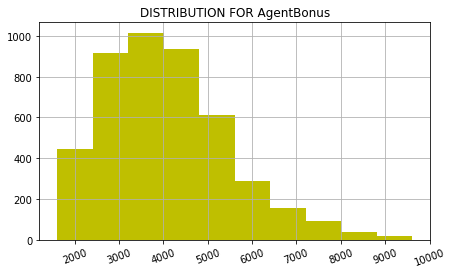

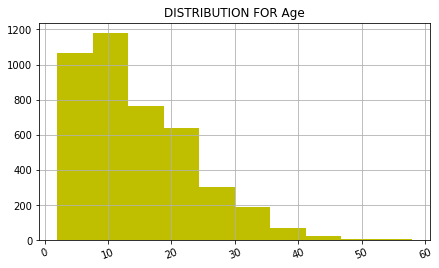

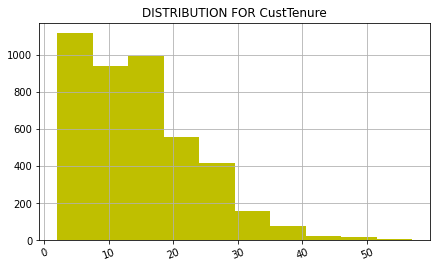

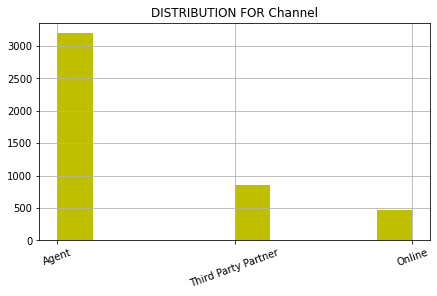

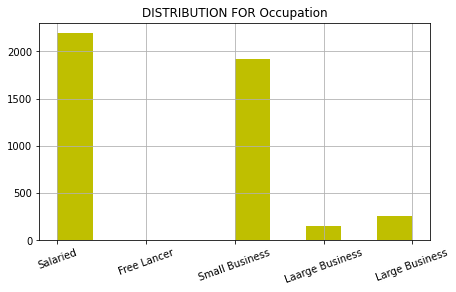

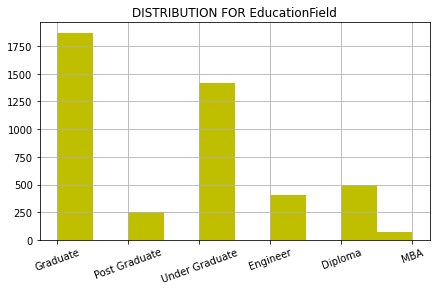

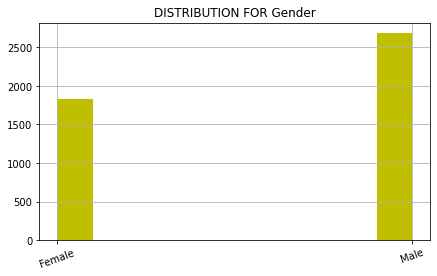

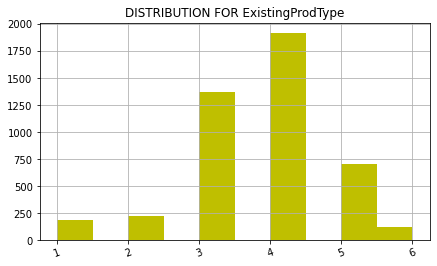

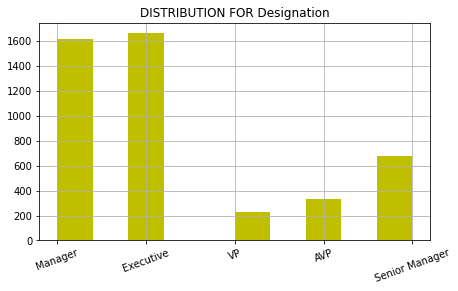

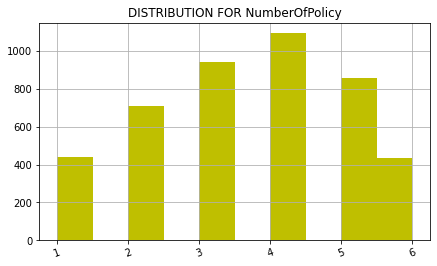

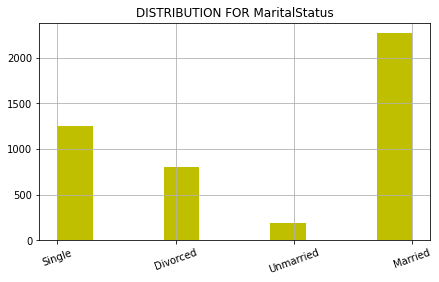

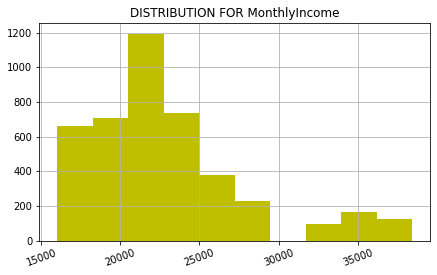

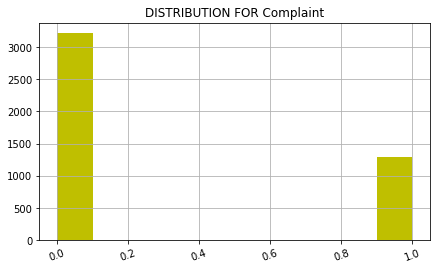

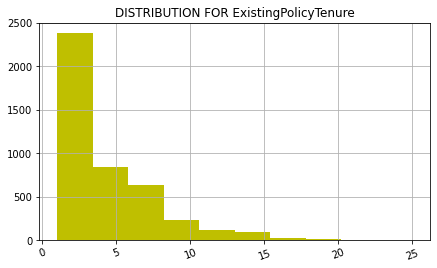

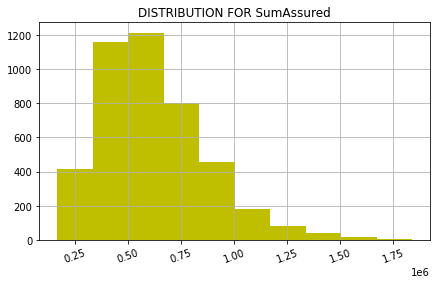

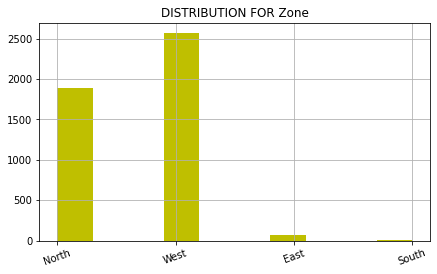

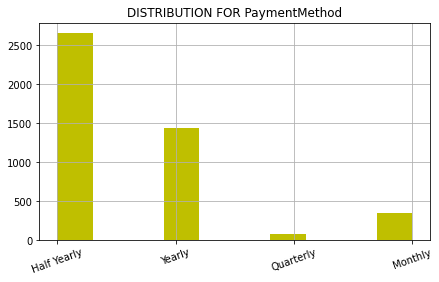

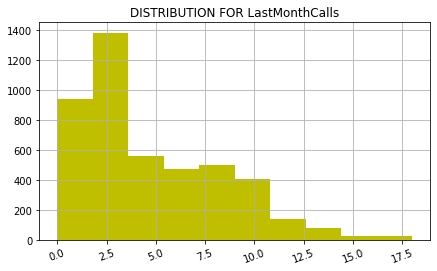

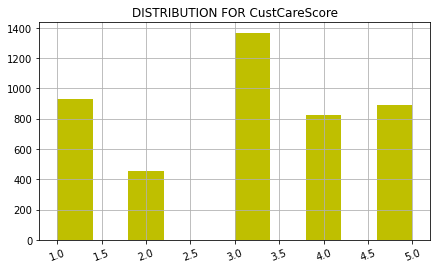

In [35]:
# Function definition for plotting the graphs

def plot_distribution(data, feature_list):
    for n in feature_list:
        plt.figure(figsize=(7,4))
        plt.hist(data[n], bins=10,color= "y")
        plt.title("DISTRIBUTION FOR {}".format(n))
        plt.xticks(rotation = 20)
        plt.grid()
plot_distribution(df, df.columns)

### Non Visual Univariate Analysis for Categorical Variables:

In [36]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CHANNEL : 3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


OCCUPATION : 5
Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64


EDUCATIONFIELD : 6
MBA                 74
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1420
Graduate          1870
Name: EducationField, dtype: int64


GENDER : 2
Female    1832
Male      2688
Name: Gender, dtype: int64


DESIGNATION : 5
VP                 226
AVP                336
Senior Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64


MARITALSTATUS : 4
Unmarried     194
Divorced      804
Single       1254
Married      2268
Name: MaritalStatus, dtype: int64


ZONE : 4
South       6
East       64
North    1884
West     2566
Name: Zone, dtype: int64


PAYMENTMETHOD : 4
Quarterly        76
Monthly         354
Y

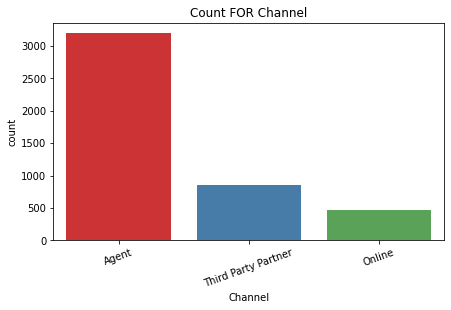

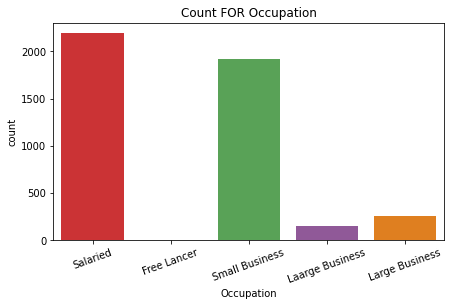

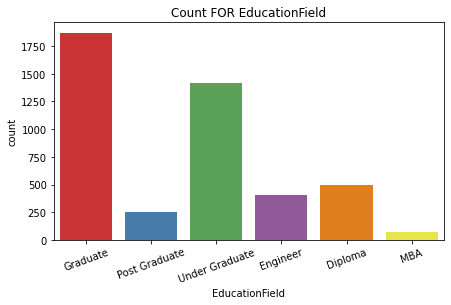

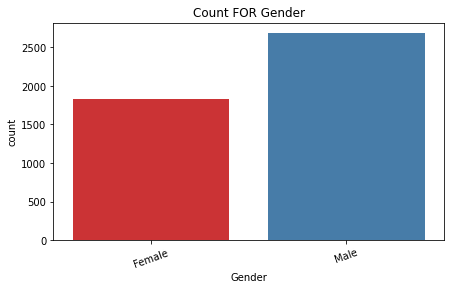

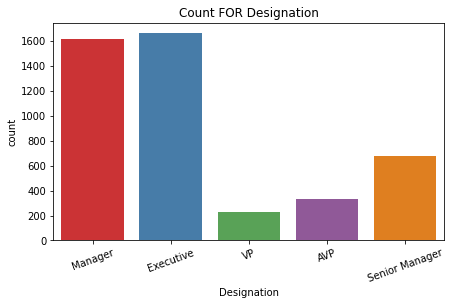

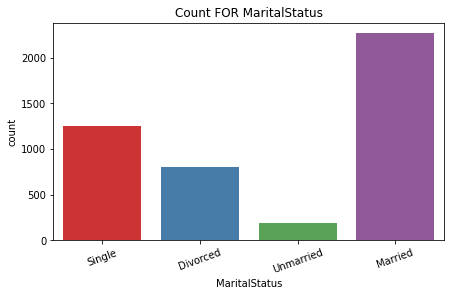

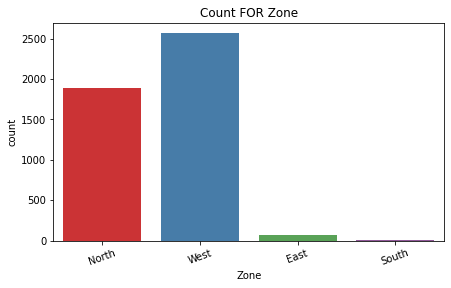

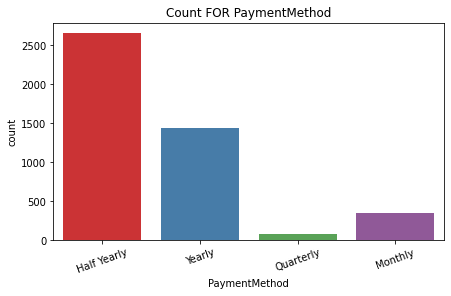

In [37]:
# Function for Countplot
for n in df[categorical_features].columns:
        plt.figure(figsize=(7,4));
        sns.countplot(df[n],palette='Set1', linewidth=2.5);
        plt.title("Count FOR {}".format(n));
        plt.xticks(rotation = 20)


## b) Bivariate analysis (relationship between different variables , correlations)

In [38]:
df._get_numeric_data().columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'ExistingProdType',
       'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure',
       'SumAssured', 'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [39]:
df[['AgentBonus', 'Age', 'CustTenure',
       'MonthlyIncome', 'Complaint',
       'SumAssured', 'PaymentMethod', 'LastMonthCalls',
       'CustCareScore']]

,AgentBonus,Age,CustTenure,MonthlyIncome,Complaint,SumAssured,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,20993.0,1,806761.0,Half Yearly,5,2.0
1,2214,11.0,2.0,20130.0,0,294502.0,Yearly,7,3.0
2,4273,26.0,4.0,17090.0,1,NaN,Yearly,0,3.0
3,1791,11.0,NaN,17909.0,1,268635.0,Half Yearly,0,5.0
4,2955,6.0,NaN,18468.0,0,366405.0,Half Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...
4515,3953,4.0,8.0,26355.0,0,636473.0,Yearly,9,1.0
4516,2939,9.0,9.0,20991.0,0,296813.0,Yearly,1,3.0
4517,3792,23.0,23.0,NaN,0,667371.0,Half Yearly,4,1.0
4518,4816,10.0,10.0,20068.0,0,943999.0,Half Yearly,1,5.0


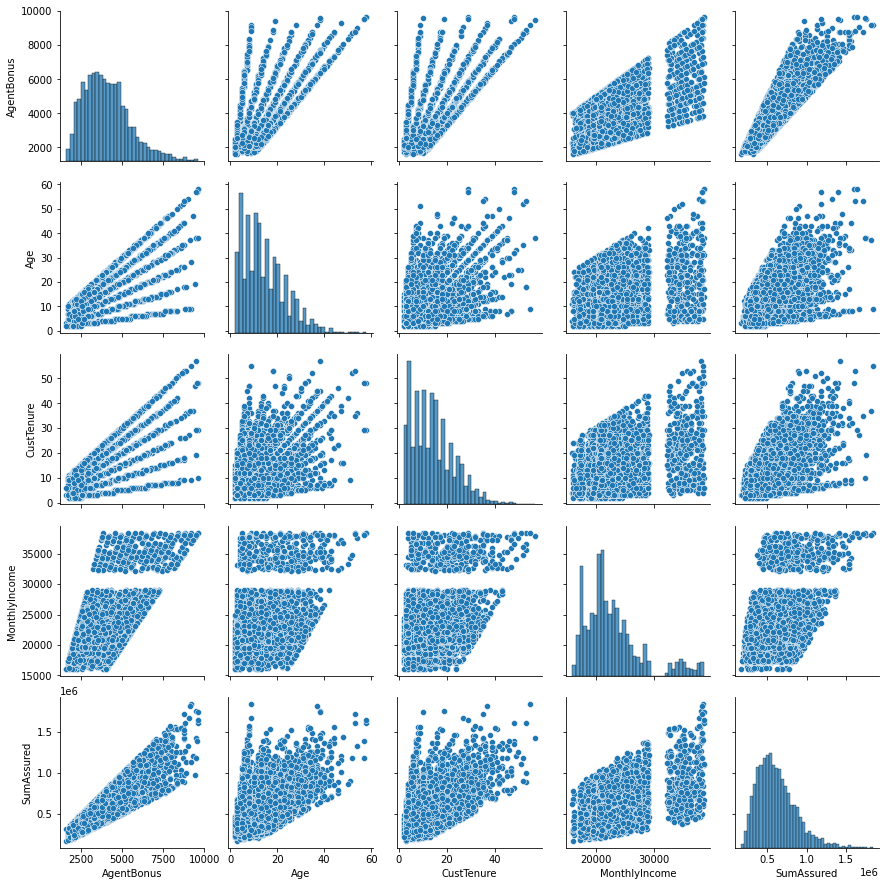

In [40]:
sns.pairplot(df[['AgentBonus', 'Age', 'CustTenure', 
       'MonthlyIncome',
       'SumAssured']],palette="husl");

In [41]:
corr= df[numerical_features].corr()

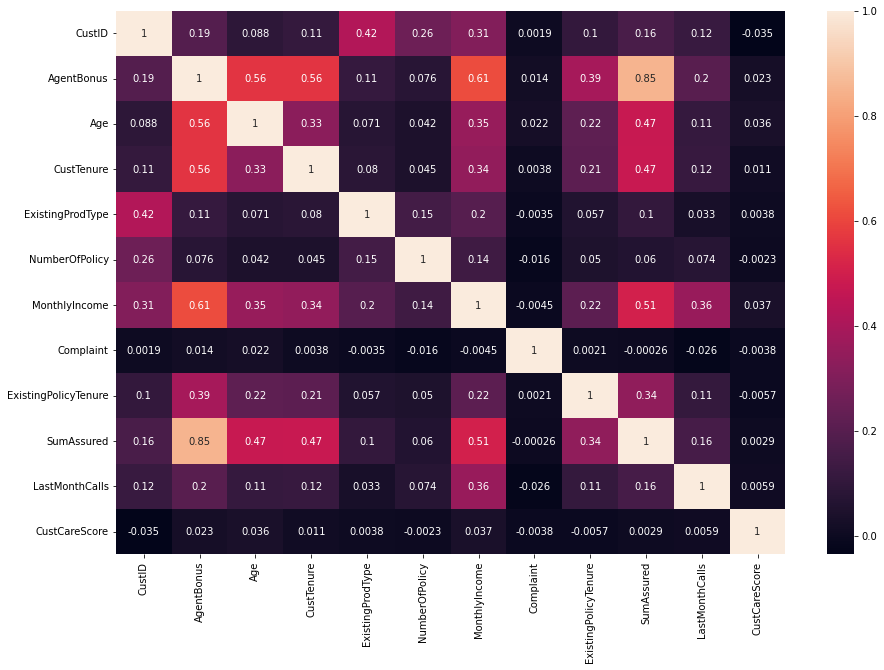

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True);

In [43]:
# Check for features with >70% correlation 

corr[corr>0.70]

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
CustID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgentBonus,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.854257,NaN,NaN
Age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustTenure,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPolicy,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyIncome,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ExistingPolicyTenure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
SumAssured,NaN,0.854257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


### c) Removal of unwanted variables (if applicable):

In [44]:
df.drop(columns="CustID",axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4251 non-null   float64
 2   CustTenure            4294 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4475 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4284 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4336 non-null   float64
 14  SumAssured            4366 non-null   float64
 15  Zone                 

### d) Missing Value treatment (if applicable):

In [45]:
df.isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [46]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percentage_Missing': percent_missing})


missing_value_df.sort_values('Percentage_Missing', inplace=True,ascending=False)

missing_value_df

,Percentage_Missing
Age,5.951327
MonthlyIncome,5.221239
CustTenure,5.000000
ExistingPolicyTenure,4.070796
SumAssured,3.407080
CustCareScore,1.150442
NumberOfPolicy,0.995575
ExistingProdType,0.000000
Designation,0.000000
Gender,0.000000


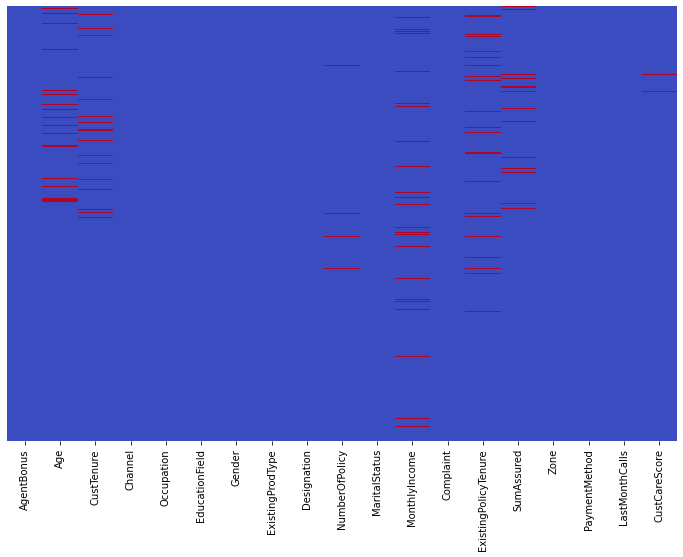

In [47]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [48]:
df["ExistingPolicyTenure"].mean()

4.130073800738008

In [49]:
df["CustCareScore"].mean()

3.067591763652641

In [50]:
df["NumberOfPolicy"].mean()

3.56536312849162

In [51]:
df["ExistingPolicyTenure"].mode()

0    1.0
Name: ExistingPolicyTenure, dtype: float64

In [52]:
df["CustCareScore"].mode()

0    3.0
Name: CustCareScore, dtype: float64

In [53]:
df["NumberOfPolicy"].mode()

0    4.0
Name: NumberOfPolicy, dtype: float64

In [54]:
df[df["Age"].isnull()]

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
19,4258,NaN,21.0,Agent,Small Business,Under Graduate,Male,3,Manager,2.0,Divorced,17741.0,1,3.0,847310.0,West,Half Yearly,7,2.0
22,3466,NaN,3.0,Agent,Salaried,Graduate,Male,2,Executive,4.0,Married,17328.0,1,1.0,374285.0,West,Quarterly,2,4.0
30,4414,NaN,9.0,Agent,Large Business,Engineer,Female,3,Executive,5.0,Unmarried,17657.0,1,4.0,560610.0,West,Half Yearly,4,4.0
37,2291,NaN,2.0,Agent,Small Business,Under Graduate,Female,4,Executive,4.0,Divorced,17622.0,0,2.0,341338.0,West,Yearly,1,4.0
45,4347,NaN,4.0,Agent,Small Business,Under Graduate,Male,4,Executive,2.0,Unmarried,17389.0,1,3.0,434725.0,West,Yearly,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,3996,NaN,16.0,Agent,Salaried,Under Graduate,Female,1,Manager,4.0,Married,17372.0,1,6.0,771143.0,North,Monthly,0,3.0
2224,2258,NaN,11.0,Agent,Large Business,Graduate,Male,3,Executive,3.0,Married,17372.0,0,1.0,381663.0,North,Yearly,2,5.0
2239,4167,NaN,25.0,Agent,Salaried,Graduate,Male,3,Executive,5.0,Married,17362.0,0,4.0,733371.0,West,Yearly,2,3.0
2253,3130,NaN,16.0,Agent,Salaried,Graduate,Male,3,Executive,4.0,Married,17387.0,0,9.0,510135.0,West,Monthly,3,1.0


In [55]:
# Replacing with Median:
df.Age.replace(np.nan, df.Age.median(), inplace = True)
df.MonthlyIncome.replace(np.nan, df.MonthlyIncome.median(), inplace = True)
df.SumAssured.replace(np.nan, df.SumAssured.median(), inplace = True)
df.CustTenure.replace(np.nan, df.CustTenure.median(), inplace = True)

In [56]:
# Replacing with Mean:
df.ExistingPolicyTenure.replace(np.nan, df.ExistingPolicyTenure.mean(), inplace = True)
df.CustCareScore.replace(np.nan, df.CustCareScore.mean(), inplace = True)
df.NumberOfPolicy.replace(np.nan, df.NumberOfPolicy.mean(), inplace = True)

In [57]:
df.isnull().sum().sum()

# Null Values Treated

0

### e) Outlier treatment (if required):

In [58]:
def percent_outlier(col):
    counter = 0
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - (1.5*IQR)
    ub = Q3 + (1.5*IQR)
    for val in col:
        if val>ub or val<lb: 
            counter=counter+1
        else : pass
    return 100*counter/len(col)


# Finding % Outliers in our Data
def outlier_percentage_df(data, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(data[x]),2)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

outlier_percentage_df(df,df._get_numeric_data().columns)

,% OUTLIERS
MonthlyIncome,8.50
ExistingPolicyTenure,7.63
ExistingProdType,6.77
SumAssured,2.43
Age,2.32
AgentBonus,2.21
CustTenure,2.15
LastMonthCalls,0.27
NumberOfPolicy,0.00
Complaint,0.00


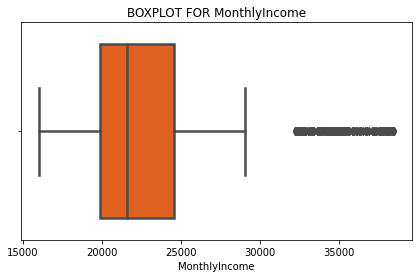

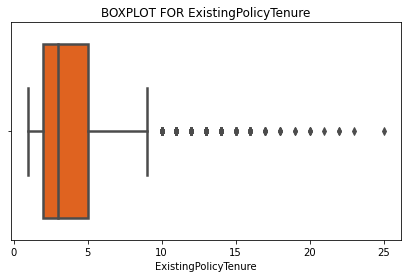

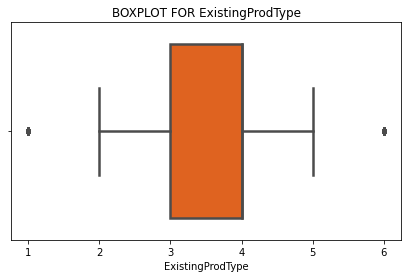

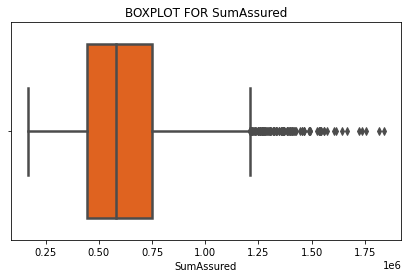

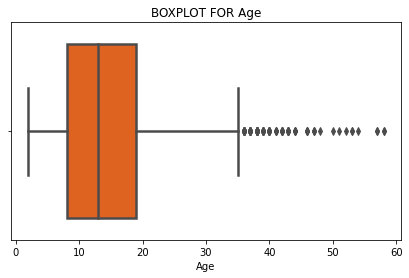

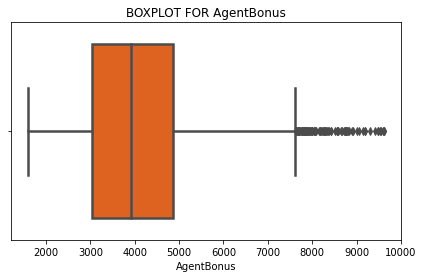

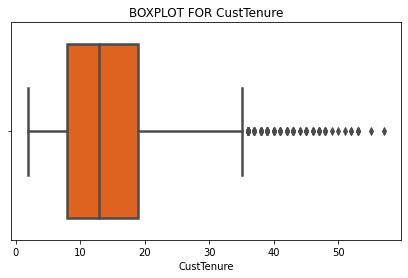

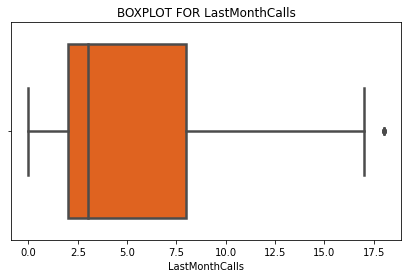

In [59]:
# ANALYZING THE FEATURES USING BOXPLOTS
plot_boxplot(df[["MonthlyIncome","ExistingPolicyTenure","ExistingProdType","SumAssured","Age","AgentBonus","CustTenure","LastMonthCalls"]], 
df[["MonthlyIncome","ExistingPolicyTenure","ExistingProdType","SumAssured","Age","AgentBonus","CustTenure","LastMonthCalls"]].columns)

### f) Variable transformation (if applicable)

In [60]:
categorical_features

['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus',
 'Zone',
 'PaymentMethod']

In [61]:
df["Channel"].value_counts()

#Nominal

Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64

In [62]:
df["Channel"] = pd.Categorical(df["Channel"]).codes

In [63]:
df["Channel"].value_counts()

0    3194
2     858
1     468
Name: Channel, dtype: int64

In [64]:
df["Occupation"].value_counts()

#Nominal 

Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64

In [65]:
df["Occupation"] = pd.Categorical(df["Occupation"]).codes

In [66]:
df["Occupation"].value_counts()

3    2192
4    1918
2     255
1     153
0       2
Name: Occupation, dtype: int64

In [67]:
df["EducationField"].value_counts()

#Nominal 

Graduate          1870
Under Graduate    1420
Diploma            496
Engineer           408
Post Graduate      252
MBA                 74
Name: EducationField, dtype: int64

In [68]:
df["EducationField"] = pd.Categorical(df["EducationField"]).codes

In [69]:
df["EducationField"].value_counts()

2    1870
5    1420
0     496
1     408
4     252
3      74
Name: EducationField, dtype: int64

In [70]:
df["Gender"].value_counts()

#Nominal

Male      2688
Female    1832
Name: Gender, dtype: int64

In [71]:
df["Gender"] = pd.Categorical(df["Gender"]).codes

In [72]:
df["Gender"].value_counts()

1    2688
0    1832
Name: Gender, dtype: int64

In [73]:
df["MaritalStatus"].value_counts()

#Nominal

Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: MaritalStatus, dtype: int64

In [74]:
df["MaritalStatus"] = pd.Categorical(df["MaritalStatus"]).codes

In [75]:
df["MaritalStatus"].value_counts()

1    2268
2    1254
0     804
3     194
Name: MaritalStatus, dtype: int64

In [76]:
df["Zone"].value_counts()

#Nominal

West     2566
North    1884
East       64
South       6
Name: Zone, dtype: int64

In [77]:
df["Zone"] = pd.Categorical(df["Zone"]).codes

In [78]:
df["Zone"].value_counts()

3    2566
1    1884
0      64
2       6
Name: Zone, dtype: int64

In [79]:
df["PaymentMethod"].value_counts()

#Nominal

Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: PaymentMethod, dtype: int64

In [80]:
df["PaymentMethod"] = pd.Categorical(df["PaymentMethod"]).codes

In [81]:
df["PaymentMethod"].value_counts()

0    2656
3    1434
1     354
2      76
Name: PaymentMethod, dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   int8   
 4   Occupation            4520 non-null   int8   
 5   EducationField        4520 non-null   int8   
 6   Gender                4520 non-null   int8   
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   int8   
 11  MonthlyIncome         4520 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   float64
 15  Zone                 

In [83]:
df["Designation"].value_counts()

Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64

In [84]:
Designation_Map = {"Executive" : 1,
                   "Manager" : 2,
                   "Senior Manager" : 3,
                   "AVP" : 4,
                   "VP" : 5
                  }

df["DesignationOrdinal"]=df["Designation"].map(Designation_Map)

In [85]:
df[["Designation","DesignationOrdinal"]]

,Designation,DesignationOrdinal
0,Manager,2
1,Manager,2
2,Executive,1
3,Executive,1
4,Executive,1
...,...,...
4515,Senior Manager,3
4516,Executive,1
4517,AVP,4
4518,Executive,1


In [86]:
df.drop(columns=["Designation"], inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   int8   
 4   Occupation            4520 non-null   int8   
 5   EducationField        4520 non-null   int8   
 6   Gender                4520 non-null   int8   
 7   ExistingProdType      4520 non-null   int64  
 8   NumberOfPolicy        4520 non-null   float64
 9   MaritalStatus         4520 non-null   int8   
 10  MonthlyIncome         4520 non-null   float64
 11  Complaint             4520 non-null   int64  
 12  ExistingPolicyTenure  4520 non-null   float64
 13  SumAssured            4520 non-null   float64
 14  Zone                  4520 non-null   int8   
 15  PaymentMethod        

In [88]:
from scipy.stats import zscore 
scaleddf = df.apply(zscore)
scaleddf.describe().T

,count,mean,std,min,25%,50%,75%,max
AgentBonus,4520.0,1.279704e-17,1.000111,-1.762327,-0.748370,-0.118545,0.562593,3.941201
Age,4520.0,4.804217e-16,1.000111,-1.414458,-0.730360,-0.160279,0.523819,4.970455
CustTenure,4520.0,-4.906105e-16,1.000111,-1.418006,-0.731629,-0.159648,0.526728,4.873782
Channel,4520.0,-5.801652e-17,1.000111,-0.609065,-0.609065,-0.609065,0.651454,1.911973
Occupation,4520.0,6.431679e-17,1.000111,-4.527983,-0.410255,-0.410255,0.962322,0.962322
EducationField,4520.0,-1.269879e-16,1.000111,-1.589222,-0.437870,-0.437870,1.289158,1.289158
Gender,4520.0,1.635860e-16,1.000111,-1.211301,-1.211301,0.825559,0.825559,0.825559
ExistingProdType,4520.0,8.300636e-16,1.000111,-2.647486,-0.678318,0.306267,0.306267,2.275436
NumberOfPolicy,4520.0,7.931807e-15,1.000111,-1.771050,-1.080680,0.300060,0.990430,1.680800
MaritalStatus,4520.0,1.857818e-15,1.000111,-1.539844,-0.240834,-0.240834,1.058175,2.357185


### f) Addition of new variables (if required):

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   int8   
 4   Occupation            4520 non-null   int8   
 5   EducationField        4520 non-null   int8   
 6   Gender                4520 non-null   int8   
 7   ExistingProdType      4520 non-null   int64  
 8   NumberOfPolicy        4520 non-null   float64
 9   MaritalStatus         4520 non-null   int8   
 10  MonthlyIncome         4520 non-null   float64
 11  Complaint             4520 non-null   int64  
 12  ExistingPolicyTenure  4520 non-null   float64
 13  SumAssured            4520 non-null   float64
 14  Zone                  4520 non-null   int8   
 15  PaymentMethod        

## 4. Insights from EDA:

a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business 

b) Any business insights using clustering (if applicable) 

c) Any other business insights

## b) Any business insights using clustering (if applicable) 

We will use Hierarchical Clustering:

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 

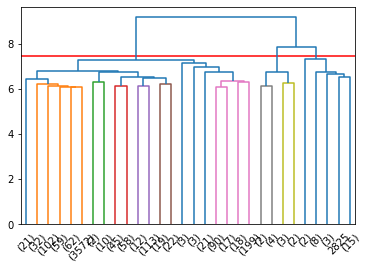

In [91]:
link_method = linkage(scaleddf, method = 'average')
plt.plot([7.45]*2000000, color='r')
dendo= dendrogram(link_method,truncate_mode='lastp',p=30)

In [92]:
from scipy.cluster.hierarchy import fcluster

In [93]:
cluster3= fcluster(link_method,3,criterion='maxclust')

In [94]:
cluster3

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [95]:
df["Clusters=3"]= cluster3

In [96]:
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,DesignationOrdinal,Clusters=3
0,4409,22.0,4.0,0,3,2,0,3,2.0,2,20993.0,1,2.0,806761.0,1,0,5,2.0,2,1
1,2214,11.0,2.0,2,3,2,1,4,4.0,0,20130.0,0,3.0,294502.0,1,3,7,3.0,2,1
2,4273,26.0,4.0,0,0,4,1,4,3.0,3,17090.0,1,2.0,578976.5,1,3,0,3.0,1,1
3,1791,11.0,13.0,2,3,2,0,3,3.0,0,17909.0,1,2.0,268635.0,3,0,0,5.0,1,1
4,2955,6.0,13.0,0,4,5,1,3,4.0,0,18468.0,0,4.0,366405.0,3,0,2,5.0,1,1


In [97]:
df["Clusters=3"].value_counts()

1    4480
3      29
2      11
Name: Clusters=3, dtype: int64

In [98]:
df["CustCareScore"].value_counts()

3.000000    1367
1.000000     928
5.000000     893
4.000000     826
2.000000     454
3.067592      52
Name: CustCareScore, dtype: int64

In [99]:
dfclusters=df[['AgentBonus',
 'Age',
 'CustTenure',
 'NumberOfPolicy', #1-6
 'MonthlyIncome',
'ExistingProdType', #1-6
 'ExistingPolicyTenure',
'Complaint', #0/1
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore','Clusters=3']].groupby("Clusters=3").mean()

round(dfclusters.T,2)

Clusters=3,1,2,3
AgentBonus,4040.94,7059.82,8646.52
Age,14.26,19.73,34.76
CustTenure,14.21,28.27,38.41
NumberOfPolicy,3.56,3.18,4.26
MonthlyIncome,22711.33,31654.36,36764.24
ExistingProdType,3.68,2.82,4.72
ExistingPolicyTenure,4.06,19.45,8.57
Complaint,0.29,0.36,0.31
SumAssured,613056.77,997513.27,1331521.10
LastMonthCalls,4.61,5.18,6.79


In [100]:
dfclusterscat=df[['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'DesignationOrdinal',
 'MaritalStatus',
 'Zone',
     'Complaint', #0/1
 'PaymentMethod','ExistingProdType',"Clusters=3"]].groupby("Clusters=3").max().T

dfclusterscat

Clusters=3,1,2,3
Channel,2,2,2
Occupation,4,4,4
EducationField,5,5,5
Gender,1,1,1
DesignationOrdinal,5,5,5
MaritalStatus,3,2,2
Zone,3,3,3
Complaint,1,1,1
PaymentMethod,3,3,3
ExistingProdType,6,5,6


In [101]:
dfclusters=df[['AgentBonus',
 'Age',
 'CustTenure',
 'NumberOfPolicy', #1-6
 'MonthlyIncome',
'ExistingProdType', #1-6
 'ExistingPolicyTenure',
'Complaint', #0/1
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore','Clusters=3']].groupby("Clusters=3").mean()

round(dfclusters.T,2)

Clusters=3,1,2,3
AgentBonus,4040.94,7059.82,8646.52
Age,14.26,19.73,34.76
CustTenure,14.21,28.27,38.41
NumberOfPolicy,3.56,3.18,4.26
MonthlyIncome,22711.33,31654.36,36764.24
ExistingProdType,3.68,2.82,4.72
ExistingPolicyTenure,4.06,19.45,8.57
Complaint,0.29,0.36,0.31
SumAssured,613056.77,997513.27,1331521.10
LastMonthCalls,4.61,5.18,6.79


### -----------------------------------------------------------------------------------------------------------------------------------------------------

# PROJECT MILESTONE 2
We will use the data which is not scaled and then the scaled and treated data for our models

The data will be split in a 70:30 ratio, i.e. 70 Training and 30 Test

Divide Dataset into Train v/s Test – 70:30 In this case we are dividing the data in to a 70:30 train/test split We will be using the scaled data for this where the categorical data is converted to numerical features.

Train Score - 0.808 Test Score - 0.799

Comment on coefficients R 2 and adjusted R 2

Insights on effect of independant variable on dependant variable Significance of variable using p value - remove insignificant variables

# 1. Model building and interpretation

## a.) Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') # To supress warnings

In [103]:
# Scaled data model 
scaleddf.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,DesignationOrdinal
0,0.236010,0.865868,-1.189214,-0.609065,-0.410255,-0.437870,-1.211301,-0.678318,-1.08068,1.058175,-0.384155,1.575525,-0.649970,0.777226,-1.108182,-0.777993,0.103049,-0.776523,-0.071796
1,-1.328309,-0.388311,-1.418006,1.911973,-0.410255,-0.437870,0.825559,0.306267,0.30006,-1.539844,-0.565291,-0.634709,-0.344830,-1.338756,-1.108182,1.416181,0.655576,-0.049164,-0.071796
2,0.139087,1.321933,-1.189214,-0.609065,-4.527983,0.713482,0.825559,0.306267,-0.39031,2.357185,-1.203361,1.575525,-0.649970,-0.163681,-1.108182,1.416181,-1.278269,-0.049164,-0.963334
3,-1.629770,-0.388311,-0.159648,1.911973,-0.410255,-0.437870,-1.211301,-0.678318,-0.39031,-1.539844,-1.031460,1.575525,-0.649970,-1.445604,0.866191,-0.777993,-1.278269,1.405555,-0.963334
4,-0.800217,-0.958393,-0.159648,-0.609065,0.962322,1.289158,0.825559,-0.678318,0.30006,-1.539844,-0.914131,-0.634709,-0.039691,-1.041747,0.866191,-0.777993,-0.725742,1.405555,-0.963334


In [104]:
round(scaleddf.describe().T,4)

,count,mean,std,min,25%,50%,75%,max
AgentBonus,4520.0,0.0,1.0001,-1.7623,-0.7484,-0.1185,0.5626,3.9412
Age,4520.0,0.0,1.0001,-1.4145,-0.7304,-0.1603,0.5238,4.9705
CustTenure,4520.0,-0.0,1.0001,-1.4180,-0.7316,-0.1596,0.5267,4.8738
Channel,4520.0,-0.0,1.0001,-0.6091,-0.6091,-0.6091,0.6515,1.9120
Occupation,4520.0,0.0,1.0001,-4.5280,-0.4103,-0.4103,0.9623,0.9623
EducationField,4520.0,-0.0,1.0001,-1.5892,-0.4379,-0.4379,1.2892,1.2892
Gender,4520.0,0.0,1.0001,-1.2113,-1.2113,0.8256,0.8256,0.8256
ExistingProdType,4520.0,0.0,1.0001,-2.6475,-0.6783,0.3063,0.3063,2.2754
NumberOfPolicy,4520.0,0.0,1.0001,-1.7710,-1.0807,0.3001,0.9904,1.6808
MaritalStatus,4520.0,0.0,1.0001,-1.5398,-0.2408,-0.2408,1.0582,2.3572


In [105]:
X= df.drop(columns="AgentBonus")
y= df.AgentBonus

In [106]:
Xs= scaleddf.drop(columns="AgentBonus")
ys= scaleddf.AgentBonus

In [107]:
ys.head()

0    0.236010
1   -1.328309
2    0.139087
3   -1.629770
4   -0.800217
Name: AgentBonus, dtype: float64

In [108]:
x_train,x_test, y_train,y_test= train_test_split(X, y, test_size=0.30 , random_state=1)

In [109]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(Xs, ys, test_size=0.30 , random_state=1)

In [110]:
#checking if split correct
len(x_train_scaled)/len(scaleddf) 

0.7

In [111]:
# concatenate X and y into a single dataframe
data_train = pd.concat([x_train_scaled, y_train_scaled], axis=1)
data_test=pd.concat([x_test_scaled,y_test_scaled],axis=1)
data_train.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,DesignationOrdinal,AgentBonus
2461,-0.274295,0.183540,1.911973,-3.155407,-1.013546,0.825559,0.306267,-0.39031,1.058175,-0.436837,1.575525,-0.039691,-0.569217,0.866191,-0.777993,-1.002006,0.678196,-0.963334,-0.097521
3681,1.892015,0.069144,-0.609065,0.962322,1.289158,0.825559,0.306267,0.99043,-0.240834,0.120635,-0.634709,-0.039691,-0.003697,0.866191,-0.777993,-0.725742,0.678196,-0.071796,0.762676
1309,0.067754,-0.960421,-0.609065,-0.410255,-0.437870,0.825559,-0.678318,-1.77105,1.058175,-1.383448,-0.634709,0.570589,-0.682563,-1.108182,-0.777993,-1.278269,1.405555,-0.963334,-0.708283
4254,-1.072409,0.183540,0.651454,-1.782831,-1.013546,0.825559,0.306267,-1.08068,-0.240834,0.149600,-0.634709,-0.955109,-1.389584,0.866191,-0.777993,0.931839,-0.049164,-0.071796,-1.061056
1335,-0.730360,0.297936,-0.609065,-0.410255,-0.437870,0.825559,-2.647486,-1.77105,-0.240834,-1.165791,-0.634709,0.570589,0.543446,0.866191,-0.046602,-1.002006,1.405555,-0.963334,0.047864


In [112]:
data_test.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,DesignationOrdinal,AgentBonus
610,-0.388311,0.984313,1.911973,-0.410255,-0.437870,0.825559,-0.678318,-1.08068,1.058175,-0.014116,-0.634709,-9.551095e-01,0.687677,0.866191,-0.777993,-0.173215,-0.776523,-0.071796,1.148233
1519,0.637835,-0.846025,-0.609065,0.962322,1.289158,-1.211301,-0.678318,-1.77105,-0.240834,2.454419,-0.634709,2.710184e-16,2.402218,-1.108182,-0.777993,0.379312,-1.503882,2.602816,1.767546
1620,-0.844377,0.069144,-0.609065,-0.410255,0.713482,0.825559,-0.678318,-1.77105,-0.240834,-0.866066,-0.634709,-3.969067e-02,-0.778155,-1.108182,-0.777993,0.931839,-0.049164,-0.071796,-1.173659
2031,-0.160279,0.869917,1.911973,0.962322,1.289158,0.825559,-0.678318,0.30006,-0.240834,-0.301877,1.575525,-3.969067e-02,1.099155,-1.108182,-0.777993,0.655576,1.405555,-0.071796,0.294450
494,-0.274295,-0.045252,-0.609065,0.962322,1.289158,0.825559,-0.678318,-0.39031,-1.539844,-1.167890,-0.634709,-9.551095e-01,-1.507267,0.866191,-0.777993,-1.278269,-0.776523,-0.963334,-1.184349


In [113]:
data_train.columns

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'NumberOfPolicy', 'MaritalStatus',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'Zone', 'PaymentMethod', 'LastMonthCalls', 'CustCareScore',
       'DesignationOrdinal', 'AgentBonus'],
      dtype='object')

In [114]:
eqn = 'AgentBonus ~ Age  + CustTenure + Channel + Occupation + EducationField + Gender + ExistingProdType + NumberOfPolicy + MaritalStatus + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + Zone + PaymentMethod + LastMonthCalls + CustCareScore + DesignationOrdinal'

In [115]:
import statsmodels.formula.api as smf
lmols = smf.ols(formula= eqn, data = data_train).fit()
lmols.params

Intercept              -0.001788
Age                     0.141166
CustTenure              0.148068
Channel                 0.003769
Occupation             -0.007737
EducationField          0.005270
Gender                  0.010345
ExistingProdType       -0.001357
NumberOfPolicy          0.015643
MaritalStatus          -0.001270
MonthlyIncome           0.115424
Complaint               0.015627
ExistingPolicyTenure    0.086879
SumAssured              0.591159
Zone                    0.003040
PaymentMethod          -0.008410
LastMonthCalls         -0.008335
CustCareScore           0.010502
DesignationOrdinal      0.083344
dtype: float64

In [116]:
print(lmols.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     734.7
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:44   Log-Likelihood:                -1885.5
No. Observations:                3164   AIC:                             3809.
Df Residuals:                    3145   BIC:                             3924.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0018 

In [117]:
# Calculate MSE for train
mse = np.mean((lmols.predict(data_train.drop('AgentBonus',axis=1))-data_train['AgentBonus'])**2)

In [118]:
#Root Mean Squared Error - RMSE train
np.sqrt(mse)

0.43910193256152996

In [119]:
# Prediction on Test data
y_pred = lmols.predict(data_test)

In [120]:
# Calculate MSE for test
msetest = np.mean((lmols.predict(data_test.drop('AgentBonus',axis=1))-data_test['AgentBonus'])**2)

In [121]:
#Root Mean Squared Error - RMSE train
np.sqrt(msetest)

0.4465774644818106

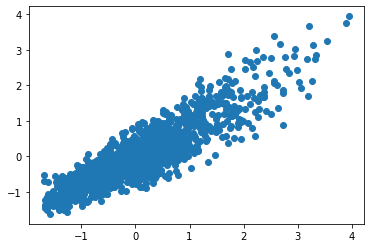

In [122]:
plt.scatter(y_test_scaled, y_pred)
plt.show()

In [123]:
for i,j in np.array(lmols.params.reset_index()):
    print('({}) * {} +'.format(round(j,4),i),end=' ')

(-0.0018) * Intercept + (0.1412) * Age + (0.1481) * CustTenure + (0.0038) * Channel + (-0.0077) * Occupation + (0.0053) * EducationField + (0.0103) * Gender + (-0.0014) * ExistingProdType + (0.0156) * NumberOfPolicy + (-0.0013) * MaritalStatus + (0.1154) * MonthlyIncome + (0.0156) * Complaint + (0.0869) * ExistingPolicyTenure + (0.5912) * SumAssured + (0.003) * Zone + (-0.0084) * PaymentMethod + (-0.0083) * LastMonthCalls + (0.0105) * CustCareScore + (0.0833) * DesignationOrdinal + 

In [124]:
eqn2=  'AgentBonus ~ Age  + CustTenure + Channel + Occupation + EducationField + Gender + NumberOfPolicy + MaritalStatus + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + Zone + PaymentMethod + LastMonthCalls + CustCareScore + DesignationOrdinal'

In [125]:
lmols2 = smf.ols(formula= eqn2, data = data_train).fit()
lmols2.params

Intercept              -0.001782
Age                     0.141171
CustTenure              0.148025
Channel                 0.003733
Occupation             -0.007758
EducationField          0.005321
Gender                  0.010368
NumberOfPolicy          0.015534
MaritalStatus          -0.001267
MonthlyIncome           0.114746
Complaint               0.015625
ExistingPolicyTenure    0.086865
SumAssured              0.591122
Zone                    0.003019
PaymentMethod          -0.009067
LastMonthCalls         -0.008365
CustCareScore           0.010474
DesignationOrdinal      0.083916
dtype: float64

In [126]:
print(lmols2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     778.2
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:44   Log-Likelihood:                -1885.5
No. Observations:                3164   AIC:                             3807.
Df Residuals:                    3146   BIC:                             3916.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0018 

In [127]:
# Calculate MSE for train
mse2 = np.mean((lmols2.predict(data_train.drop('AgentBonus',axis=1))-data_train['AgentBonus'])**2)

In [128]:
#Root Mean Squared Error - RMSE train
np.sqrt(mse2)

0.4391033161911101

In [129]:
#Calculate MSE for test
msetest2 = np.mean((lmols2.predict(data_test.drop('AgentBonus',axis=1))-data_test['AgentBonus'])**2)

In [130]:
#Root Mean Squared Error - RMSE train
np.sqrt(msetest2)

0.44656410045520056

In [131]:
eqn3 =  'AgentBonus ~ Age  + CustTenure + Channel + Occupation + EducationField + Gender + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + Zone + PaymentMethod + LastMonthCalls + CustCareScore + DesignationOrdinal'

In [132]:
lmols3 = smf.ols(formula= eqn3, data = data_train).fit()
lmols3.params

Intercept              -0.001772
Age                     0.141127
CustTenure              0.148038
Channel                 0.003697
Occupation             -0.007726
EducationField          0.005300
Gender                  0.010404
NumberOfPolicy          0.015616
MonthlyIncome           0.114771
Complaint               0.015606
ExistingPolicyTenure    0.086898
SumAssured              0.591145
Zone                    0.002956
PaymentMethod          -0.009091
LastMonthCalls         -0.008349
CustCareScore           0.010508
DesignationOrdinal      0.084045
dtype: float64

In [133]:
print(lmols3.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     827.1
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:45   Log-Likelihood:                -1885.5
No. Observations:                3164   AIC:                             3805.
Df Residuals:                    3147   BIC:                             3908.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0018 

In [134]:
eqn4=  'AgentBonus ~ Age  + CustTenure + Channel + Occupation + EducationField + Gender + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + PaymentMethod + LastMonthCalls + CustCareScore + DesignationOrdinal'

In [135]:
lmols4 = smf.ols(formula= eqn4, data = data_train).fit()
lmols4.params

Intercept              -0.001801
Age                     0.141236
CustTenure              0.148059
Channel                 0.003697
Occupation             -0.007784
EducationField          0.005319
Gender                  0.010464
NumberOfPolicy          0.015472
MonthlyIncome           0.114821
Complaint               0.015632
ExistingPolicyTenure    0.086831
SumAssured              0.591059
PaymentMethod          -0.008996
LastMonthCalls         -0.008395
CustCareScore           0.010624
DesignationOrdinal      0.084132
dtype: float64

In [136]:
print(lmols4.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     882.4
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:45   Log-Likelihood:                -1885.6
No. Observations:                3164   AIC:                             3803.
Df Residuals:                    3148   BIC:                             3900.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0018 

In [137]:
eqn5 =  'AgentBonus ~ Age  + CustTenure + Occupation + EducationField + Gender + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured  + PaymentMethod + LastMonthCalls + CustCareScore + DesignationOrdinal'

In [138]:
lmols5 = smf.ols(formula= eqn5, data = data_train).fit()
lmols5.params

Intercept              -0.001804
Age                     0.141241
CustTenure              0.147996
Occupation             -0.007782
EducationField          0.005422
Gender                  0.010392
NumberOfPolicy          0.015425
MonthlyIncome           0.114779
Complaint               0.015606
ExistingPolicyTenure    0.086854
SumAssured              0.591059
PaymentMethod          -0.009036
LastMonthCalls         -0.008323
CustCareScore           0.010791
DesignationOrdinal      0.084038
dtype: float64

In [139]:
print(lmols5.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     945.7
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:45   Log-Likelihood:                -1885.7
No. Observations:                3164   AIC:                             3801.
Df Residuals:                    3149   BIC:                             3892.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0018 

In [140]:
eqn6 =  'AgentBonus ~ Age  + CustTenure + Occupation + Gender + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured  + PaymentMethod + LastMonthCalls + CustCareScore + DesignationOrdinal'

In [141]:
lmols6 = smf.ols(formula= eqn6, data = data_train).fit()
lmols6.params

Intercept              -0.001839
Age                     0.141244
CustTenure              0.148028
Occupation             -0.005206
Gender                  0.010529
NumberOfPolicy          0.015343
MonthlyIncome           0.114960
Complaint               0.015633
ExistingPolicyTenure    0.086587
SumAssured              0.591317
PaymentMethod          -0.009014
LastMonthCalls         -0.008471
CustCareScore           0.010827
DesignationOrdinal      0.083501
dtype: float64

In [142]:
print(lmols6.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1019.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:45   Log-Likelihood:                -1885.9
No. Observations:                3164   AIC:                             3800.
Df Residuals:                    3150   BIC:                             3885.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0018 

In [143]:
eqn7 =  'AgentBonus ~ Age  + CustTenure +Gender + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured  + PaymentMethod + LastMonthCalls + CustCareScore + DesignationOrdinal'

In [144]:
lmols7 = smf.ols(formula= eqn7, data = data_train).fit()
lmols7.params

Intercept              -0.001935
Age                     0.141247
CustTenure              0.148137
Gender                  0.010570
NumberOfPolicy          0.015253
MonthlyIncome           0.114810
Complaint               0.015633
ExistingPolicyTenure    0.086656
SumAssured              0.591251
PaymentMethod          -0.008928
LastMonthCalls         -0.008388
CustCareScore           0.011108
DesignationOrdinal      0.083155
dtype: float64

In [145]:
print(lmols7.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1104.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:45   Log-Likelihood:                -1886.1
No. Observations:                3164   AIC:                             3798.
Df Residuals:                    3151   BIC:                             3877.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0019 

In [146]:
eqn8 =  'AgentBonus ~ Age  + CustTenure +Gender + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured  + PaymentMethod+ CustCareScore + DesignationOrdinal'

In [147]:
lmols8 = smf.ols(formula= eqn8, data = data_train).fit()
lmols8.params

Intercept              -0.001936
Age                     0.141141
CustTenure              0.148008
Gender                  0.010704
NumberOfPolicy          0.014855
MonthlyIncome           0.113992
Complaint               0.015893
ExistingPolicyTenure    0.086152
SumAssured              0.591652
PaymentMethod          -0.008757
CustCareScore           0.011195
DesignationOrdinal      0.080749
dtype: float64

In [148]:
print(lmols8.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1204.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:45   Log-Likelihood:                -1886.6
No. Observations:                3164   AIC:                             3797.
Df Residuals:                    3152   BIC:                             3870.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0019 

In [149]:
eqn9=  'AgentBonus ~ Age  + CustTenure +Gender + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured  + CustCareScore + DesignationOrdinal'
lmols9 = smf.ols(formula= eqn9, data = data_train).fit()
lmols9.params

Intercept              -0.001893
Age                     0.140932
CustTenure              0.148239
Gender                  0.010590
NumberOfPolicy          0.014733
MonthlyIncome           0.114210
Complaint               0.015699
ExistingPolicyTenure    0.086253
SumAssured              0.591717
CustCareScore           0.011480
DesignationOrdinal      0.080644
dtype: float64

In [150]:
print(lmols9.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1324.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:45   Log-Likelihood:                -1887.2
No. Observations:                3164   AIC:                             3796.
Df Residuals:                    3153   BIC:                             3863.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0019 

In [151]:
eqn10=  'AgentBonus ~ Age  + CustTenure + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured  + CustCareScore + DesignationOrdinal'
lmols10 = smf.ols(formula= eqn10, data = data_train).fit()
lmols10.params

Intercept              -0.002091
Age                     0.140869
CustTenure              0.148251
NumberOfPolicy          0.014293
MonthlyIncome           0.115352
Complaint               0.015246
ExistingPolicyTenure    0.085753
SumAssured              0.591551
CustCareScore           0.011650
DesignationOrdinal      0.079551
dtype: float64

In [152]:
print(lmols10.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:46   Log-Likelihood:                -1888.1
No. Observations:                3164   AIC:                             3796.
Df Residuals:                    3154   BIC:                             3857.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0021 

In [153]:
eqn11=  'AgentBonus ~ Age  + CustTenure + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured  + DesignationOrdinal'
lmols11 = smf.ols(formula= eqn11, data = data_train).fit()
lmols11.params

Intercept              -0.002078
Age                     0.141471
CustTenure              0.148482
NumberOfPolicy          0.014377
MonthlyIncome           0.115822
Complaint               0.015122
ExistingPolicyTenure    0.085497
SumAssured              0.591094
DesignationOrdinal      0.079574
dtype: float64

In [154]:
print(lmols11.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1654.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:46   Log-Likelihood:                -1889.2
No. Observations:                3164   AIC:                             3796.
Df Residuals:                    3155   BIC:                             3851.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0021 

In [155]:
eqn12=  'AgentBonus ~ Age  + CustTenure + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured  + DesignationOrdinal'
lmols12 = smf.ols(formula= eqn12, data = data_train).fit()
lmols12.params

Intercept              -0.002080
Age                     0.141664
CustTenure              0.148442
MonthlyIncome           0.120874
Complaint               0.014752
ExistingPolicyTenure    0.085949
SumAssured              0.590998
DesignationOrdinal      0.075695
dtype: float64

In [156]:
print(lmols12.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1888.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:46   Log-Likelihood:                -1890.9
No. Observations:                3164   AIC:                             3798.
Df Residuals:                    3156   BIC:                             3846.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0021 

In [157]:
eqn13=  'AgentBonus ~ Age  + CustTenure + MonthlyIncome + ExistingPolicyTenure + SumAssured  + DesignationOrdinal'
lmols13 = smf.ols(formula= eqn13, data = data_train).fit()
round(lmols13.params,4)

Intercept              -0.0022
Age                     0.1419
CustTenure              0.1484
MonthlyIncome           0.1210
ExistingPolicyTenure    0.0861
SumAssured              0.5911
DesignationOrdinal      0.0752
dtype: float64

In [158]:
print(lmols13.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     2200.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:46   Log-Likelihood:                -1892.6
No. Observations:                3164   AIC:                             3799.
Df Residuals:                    3157   BIC:                             3842.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0022 

In [159]:
# Calculate MSE for train
mseols13 = np.mean((lmols13.predict(data_train.drop('AgentBonus',axis=1))-data_train['AgentBonus'])**2)

#Root Mean Squared Error - RMSE train
np.sqrt(mseols13)

# Calculate MSE for test
msetest13 = np.mean((lmols13.predict(data_test.drop('AgentBonus',axis=1))-data_test['AgentBonus'])**2)

#Root Mean Squared Error - RMSE train
np.sqrt(msetest13)

0.4449370831578234

In [160]:
#Root Mean Squared Error - RMSE train
np.sqrt(mseols13)

0.44009601320445524

In [161]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [162]:
# MAPE Train

mape(y_train_scaled, lmols13.predict(x_train_scaled))

158.7291490273978

In [163]:
# MAPE Test

mape(y_test_scaled, lmols13.predict(x_test_scaled))

217.22968981185113

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [165]:
vif = [variance_inflation_factor(Xs.values, ix) for ix in range(Xs.shape[1])] 

In [166]:
i=0
for column in Xs.columns:
    if i < 50:
        print (column ,"--->",  vif[i])
        i = i+1

Age ---> 1.3318242945163827
CustTenure ---> 1.330046921603369
Channel ---> 1.0066249825033353
Occupation ---> 1.303438937004974
EducationField ---> 1.3018772818552435
Gender ---> 1.0139686675306296
ExistingProdType ---> 1.524535875696359
NumberOfPolicy ---> 1.0659136458632512
MaritalStatus ---> 1.0291129494313538
MonthlyIncome ---> 3.715839760513621
Complaint ---> 1.003645683208694
ExistingPolicyTenure ---> 1.1306992026239535
SumAssured ---> 1.742812587009907
Zone ---> 1.0086815566075216
PaymentMethod ---> 1.3658213037929485
LastMonthCalls ---> 1.1702907464189178
CustCareScore ---> 1.010096910261933
DesignationOrdinal ---> 3.5837388550187055


## b. Test your predictive model against the test set using various appropriate performance metrics |

In [167]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
        i.fit(x_train_scaled,y_train_scaled)
        scores_train.append(i.score(x_train_scaled,y_train_scaled))
        scores_test.append(i.score(x_test_scaled, y_test_scaled))
        rmse_train.append(np.sqrt(mean_squared_error(y_train_scaled,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test_scaled,i.predict(x_test_scaled))))
        mape_train.append(mape(y_train_scaled, i.predict(x_train_scaled)))
        mape_test.append(mape(y_test_scaled, i.predict(x_test_scaled)))
        
        
result1 = pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test,
                    'Training MAPE':mape_train,'Test MAPE': mape_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor'])

result1



,Train RMSE,Test RMSE,Training Score,Test Score,Training MAPE,Test MAPE
Linear Regression,0.439102,0.446577,0.807881,0.798861,158.280045,214.571432
Decision Tree Regressor,0.000000,0.538937,1.000000,0.707059,0.000000,295.328720
Random Forest Regressor,0.140899,0.379980,0.980219,0.854379,50.759780,194.349852
ANN Regressor,0.062869,0.510206,0.996062,0.737461,25.204602,303.563046


In [168]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(x_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, round(regression_model.coef_[idx],2)))

The coefficient for Age is 0.14
The coefficient for CustTenure is 0.15
The coefficient for Channel is 0.0
The coefficient for Occupation is -0.01
The coefficient for EducationField is 0.01
The coefficient for Gender is 0.01
The coefficient for ExistingProdType is -0.0
The coefficient for NumberOfPolicy is 0.02
The coefficient for MaritalStatus is -0.0
The coefficient for MonthlyIncome is 0.12
The coefficient for Complaint is 0.02
The coefficient for ExistingPolicyTenure is 0.09
The coefficient for SumAssured is 0.59
The coefficient for Zone is 0.0
The coefficient for PaymentMethod is -0.01
The coefficient for LastMonthCalls is -0.01
The coefficient for CustCareScore is 0.01
The coefficient for DesignationOrdinal is 0.08


In [169]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.0017879050483441692


In [170]:
# R square on training data
regression_model.score(x_train_scaled, y_train_scaled)

0.807881425058722

In [171]:
# R square on test data
regression_model.score(x_test_scaled, y_test_scaled)

0.7988607549413234

In [172]:
# 80.78% of the variation in the Agent Bonus is explained by the predictors in the model for train set
# 79.88% of the variation in the Agent Bonus is explained by the predictors in the model for test set

from sklearn import metrics

In [173]:
#RMSE on Training data
predicted_train=regression_model.fit(x_train_scaled, y_train_scaled).predict(x_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.43910193256153024

In [174]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train_scaled, y_train_scaled).predict(x_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.4465774644818107

# 2. MODEL TUNING:

## a. Ensemble modelling (if necessary)
### Ensemble Learning - GradientBoost

In [175]:
import xgboost as xg

In [176]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

In [177]:
xgb_r.fit(x_train_scaled, y_train_scaled)

[14:51:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [178]:
predxgb = xgb_r.predict(x_test_scaled)

In [179]:
predxgb

array([ 0.41613328,  2.034514  , -0.7827719 , ..., -0.8226473 ,
       -1.0318716 ,  0.94757473], dtype=float32)

In [180]:
y_test_scaled

610     1.148233
1519    1.767546
1620   -1.173659
2031    0.294450
494    -1.184349
          ...   
2124    0.782631
3220   -1.210718
1851   -1.323320
1065   -1.134461
462     0.345049
Name: AgentBonus, Length: 1356, dtype: float64

In [181]:
np.sqrt(mean_squared_error(y_train_scaled,xgb_r.predict(x_train_scaled)))

0.3131178706426993

In [182]:
np.sqrt(mean_squared_error(y_test_scaled,xgb_r.predict(x_test_scaled)))

0.38992861622959085

In [183]:
mape(y_train_scaled,xgb_r.predict(x_train_scaled))

116.11417199922214

In [184]:
mape(y_test_scaled,xgb_r.predict(x_test_scaled))

207.4574606681981

## b. Any other model tuning measures(if applicable) 

In [185]:
param_grid = {
    'max_depth': [10,13, 15, 17,20],
    'min_samples_leaf': [3, 7, 15],
    'min_samples_split': [45,50,55,60,65,70],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3, n_jobs=-1)


grid_search.fit(x_train_scaled,y_train_scaled)

print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 55}


In [186]:
grid_search.fit(x_train_scaled,y_train_scaled)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [10, 13, 15, 17, 20],
                         'min_samples_leaf': [3, 7, 15],
                         'min_samples_split': [45, 50, 55, 60, 65, 70]})

In [187]:
print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 55}


In [188]:
param_grid = {
    'hidden_layer_sizes':[(500),(1000),(2000)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3, n_jobs=-1)

In [189]:
grid_search.fit(x_train_scaled,y_train_scaled)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=10000, random_state=123),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, 1000, 2000],
                         'solver': ['sgd', 'adam']})

In [190]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 2000, 'solver': 'sgd'}


In [191]:
param_grid = {
    'max_depth': [13,15,17,19],
    'max_features': [8,10,12],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [ 8, 10, 12],
    'n_estimators': [100, 200, 300]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs=-1)

In [192]:
grid_search.fit(x_train_scaled,y_train_scaled)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [13, 15, 17, 19],
                         'max_features': [8, 10, 12],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]})

In [193]:
print(grid_search.best_params_)

{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}


## c.Interpretation of the model(s)

In [194]:
annr = MLPRegressor (activation ='relu', hidden_layer_sizes = (2000), solver='sgd', 
                     random_state=123, max_iter=10000)

rfr = RandomForestRegressor(max_depth= 17, max_features= 10, min_samples_leaf= 3, min_samples_split= 10, n_estimators= 200)
    

dtr = tree.DecisionTreeRegressor(max_depth= 15, min_samples_leaf= 3, min_samples_split=55)
    

regression_model = LinearRegression()

xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)


models=[regression_model,dtr,rfr,annr,xgb_r]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
        i.fit(x_train_scaled,y_train_scaled)
        scores_train.append(i.score(x_train_scaled,y_train_scaled))
        scores_test.append(i.score(x_test_scaled, y_test_scaled))
        rmse_train.append(np.sqrt(mean_squared_error(y_train_scaled,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test_scaled,i.predict(x_test_scaled))))
        mape_train.append(mape(y_train_scaled, i.predict(x_train_scaled)))
        mape_test.append(mape(y_test_scaled, i.predict(x_test_scaled)))
        
        
result2 = pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test,
                    'Training MAPE':mape_train,'Test MAPE': mape_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor','XGBoost'])

[15:03:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [195]:
round(result2,2)

,Train RMSE,Test RMSE,Training Score,Test Score,Training MAPE,Test MAPE
Linear Regression,0.44,0.45,0.81,0.80,158.28,214.57
Decision Tree Regressor,0.35,0.42,0.88,0.82,129.99,245.83
Random Forest Regressor,0.24,0.38,0.94,0.85,86.51,193.40
ANN Regressor,0.40,0.43,0.84,0.82,151.56,199.14
XGBoost,0.31,0.39,0.90,0.85,116.11,207.46


In [196]:
pd.DataFrame(rfr.feature_importances_, index=x_train_scaled.columns)

,0
Age,0.093014
CustTenure,0.101010
Channel,0.001780
Occupation,0.001772
EducationField,0.003011
Gender,0.001327
ExistingProdType,0.002866
NumberOfPolicy,0.004113
MaritalStatus,0.002367
MonthlyIncome,0.077137


In [197]:
data_test

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,DesignationOrdinal,AgentBonus
610,-0.388311,0.984313,1.911973,-0.410255,-0.437870,0.825559,-0.678318,-1.08068,1.058175,-0.014116,-0.634709,-9.551095e-01,0.687677,0.866191,-0.777993,-0.173215,-0.776523,-0.071796,1.148233
1519,0.637835,-0.846025,-0.609065,0.962322,1.289158,-1.211301,-0.678318,-1.77105,-0.240834,2.454419,-0.634709,2.710184e-16,2.402218,-1.108182,-0.777993,0.379312,-1.503882,2.602816,1.767546
1620,-0.844377,0.069144,-0.609065,-0.410255,0.713482,0.825559,-0.678318,-1.77105,-0.240834,-0.866066,-0.634709,-3.969067e-02,-0.778155,-1.108182,-0.777993,0.931839,-0.049164,-0.071796,-1.173659
2031,-0.160279,0.869917,1.911973,0.962322,1.289158,0.825559,-0.678318,0.30006,-0.240834,-0.301877,1.575525,-3.969067e-02,1.099155,-1.108182,-0.777993,0.655576,1.405555,-0.071796,0.294450
494,-0.274295,-0.045252,-0.609065,0.962322,1.289158,0.825559,-0.678318,-0.39031,-1.539844,-1.167890,-0.634709,-9.551095e-01,-1.507267,0.866191,-0.777993,-1.278269,-0.776523,-0.963334,-1.184349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,-1.072409,1.899482,1.911973,-0.410255,-0.437870,0.825559,-0.678318,0.99043,1.058175,1.245653,1.575525,-6.499699e-01,-0.267351,0.866191,-0.777993,2.589421,1.405555,1.711278,0.782631
3220,-0.274295,-0.846025,1.911973,-0.410255,0.713482,0.825559,0.306267,1.68080,1.058175,0.202702,-0.634709,-3.969067e-02,-0.815964,0.866191,-0.777993,-0.173215,-1.503882,-0.071796,-1.210718
1851,-0.388311,-0.159648,-0.609065,0.962322,1.289158,0.825559,-2.647486,-0.39031,1.058175,-0.906365,-0.634709,-9.551095e-01,-0.858320,-1.108182,-0.046602,-0.725742,-1.503882,-0.963334,-1.323320
1065,-0.160279,-0.502837,-0.609065,0.962322,-1.589222,-1.211301,1.290851,0.30006,2.357185,-1.062734,-0.634709,-9.551095e-01,-0.942776,0.866191,1.416181,-0.725742,-1.503882,-0.963334,-1.134461


In [198]:
predlmtest= lmols13.predict(x_test_scaled)

In [199]:
predanntest= annr.predict(x_test_scaled)

In [200]:
data = data_test.copy()

data['AgentBonusLM'] = predlmtest
data['AgentBonusANN'] = predanntest


data.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,NumberOfPolicy,MaritalStatus,MonthlyIncome,...,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,DesignationOrdinal,AgentBonus,AgentBonusLM,AgentBonusANN
610,-0.388311,0.984313,1.911973,-0.410255,-0.437870,0.825559,-0.678318,-1.08068,1.058175,-0.014116,...,-9.551095e-01,0.687677,0.866191,-0.777993,-0.173215,-0.776523,-0.071796,1.148233,0.405877,0.414983
1519,0.637835,-0.846025,-0.609065,0.962322,1.289158,-1.211301,-0.678318,-1.77105,-0.240834,2.454419,...,2.710184e-16,2.402218,-1.108182,-0.777993,0.379312,-1.503882,2.602816,1.767546,1.875202,1.866676
1620,-0.844377,0.069144,-0.609065,-0.410255,0.713482,0.825559,-0.678318,-1.77105,-0.240834,-0.866066,...,-3.969067e-02,-0.778155,-1.108182,-0.777993,0.931839,-0.049164,-0.071796,-1.173659,-0.685300,-0.796824
2031,-0.160279,0.869917,1.911973,0.962322,1.289158,0.825559,-0.678318,0.30006,-0.240834,-0.301877,...,-3.969067e-02,1.099155,-1.108182,-0.777993,0.655576,1.405555,-0.071796,0.294450,0.708472,0.664207
494,-0.274295,-0.045252,-0.609065,0.962322,1.289158,0.825559,-0.678318,-0.39031,-1.539844,-1.167890,...,-9.551095e-01,-1.507267,0.866191,-0.777993,-1.278269,-0.776523,-0.963334,-1.184349,-1.234633,-1.256485


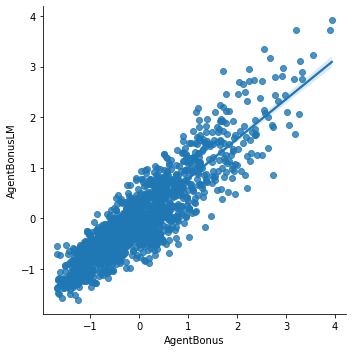

In [201]:
sns.lmplot(x='AgentBonus', y='AgentBonusLM', data=data);

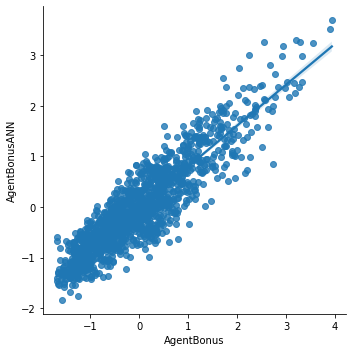

In [202]:
sns.lmplot(x='AgentBonus', y='AgentBonusANN', data=data);

In [203]:
for i in models:
        i.fit(x_train_scaled,y_train_scaled)
        scores_train.append(i.score(x_train_scaled,y_train_scaled))
        scores_test.append(i.score(x_test_scaled, y_test_scaled))
        rmse_train.append(np.sqrt(mean_squared_error(y_train_scaled,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test_scaled,i.predict(x_test_scaled))))
        mape_train.append(mape(y_train_scaled, i.predict(x_train_scaled)))
        mape_test.append(mape(y_test_scaled, i.predict(x_test_scaled)))

[15:04:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [204]:
scaleddf

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,DesignationOrdinal
0,0.236010,0.865868,-1.189214,-0.609065,-0.410255,-0.437870,-1.211301,-0.678318,-1.08068,1.058175,-0.384155,1.575525,-0.649970,0.777226,-1.108182,-0.777993,0.103049,-0.776523,-0.071796
1,-1.328309,-0.388311,-1.418006,1.911973,-0.410255,-0.437870,0.825559,0.306267,0.30006,-1.539844,-0.565291,-0.634709,-0.344830,-1.338756,-1.108182,1.416181,0.655576,-0.049164,-0.071796
2,0.139087,1.321933,-1.189214,-0.609065,-4.527983,0.713482,0.825559,0.306267,-0.39031,2.357185,-1.203361,1.575525,-0.649970,-0.163681,-1.108182,1.416181,-1.278269,-0.049164,-0.963334
3,-1.629770,-0.388311,-0.159648,1.911973,-0.410255,-0.437870,-1.211301,-0.678318,-0.39031,-1.539844,-1.031460,1.575525,-0.649970,-1.445604,0.866191,-0.777993,-1.278269,1.405555,-0.963334
4,-0.800217,-0.958393,-0.159648,-0.609065,0.962322,1.289158,0.825559,-0.678318,0.30006,-1.539844,-0.914131,-0.634709,-0.039691,-1.041747,0.866191,-0.777993,-0.725742,1.405555,-0.963334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-0.088969,-1.186425,-0.731629,-0.609065,0.962322,-0.437870,0.825559,0.306267,-1.08068,1.058175,0.741284,-0.634709,-0.649970,0.073819,0.866191,1.416181,1.208103,-1.503882,0.819741
4516,-0.811620,-0.616344,-0.617233,-0.609065,-0.410255,1.289158,-1.211301,-1.662902,-1.08068,-0.240834,-0.384574,-0.634709,-0.344830,-1.329210,-1.108182,1.416181,-1.002006,-0.049164,-0.963334
4517,-0.203709,0.979884,0.984313,-0.609065,-0.410255,-1.013546,-1.211301,1.290851,0.99043,1.058175,-0.255491,-0.634709,-0.649970,0.201449,-1.108182,-0.777993,-0.173215,-1.503882,1.711278
4518,0.526069,-0.502328,-0.502837,0.651454,0.962322,-0.437870,-1.211301,0.306267,-1.08068,1.058175,-0.578304,-0.634709,0.570589,1.344113,0.866191,-0.777993,-1.002006,1.405555,-0.963334


# Final Submission
Bivariate Analysis Insights How predictor and target variable change with one another

Bi variate and Multi variate in EDA

Add Clustering Chart if not added

# Bi variate analysis of Target Variable with Important Predictors
'AgentBonus ~ Age + CustTenure + MonthlyIncome + ExistingPolicyTenure + SumAssured + DesignationOrdinal'

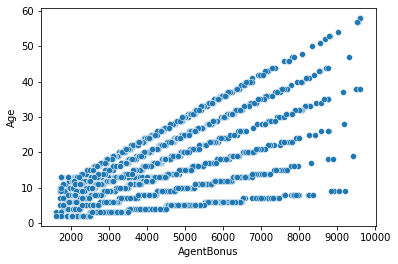

In [205]:
sns.scatterplot(df["AgentBonus"], df["Age"]);

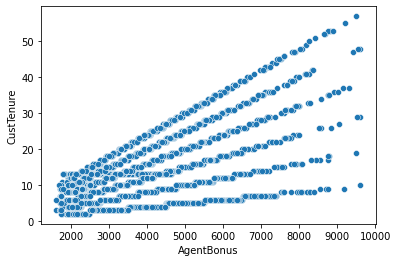

In [206]:
sns.scatterplot(df["AgentBonus"], df["CustTenure"]);

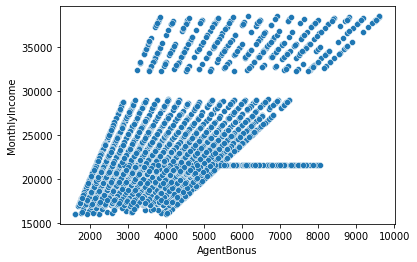

In [207]:
sns.scatterplot(df["AgentBonus"], df["MonthlyIncome"]);

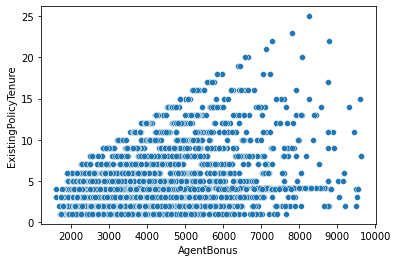

In [208]:
 sns.scatterplot(df["AgentBonus"], df["ExistingPolicyTenure"]);

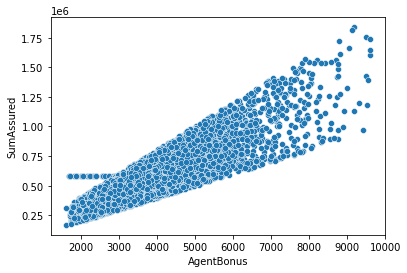

In [209]:
sns.scatterplot(df["AgentBonus"], df["SumAssured"]);

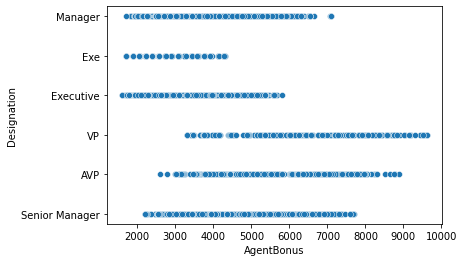

In [210]:
sns.scatterplot(dfog["AgentBonus"], dfog["Designation"]);

In [211]:
df.AgentBonus

0       4409
1       2214
2       4273
3       1791
4       2955
        ... 
4515    3953
4516    2939
4517    3792
4518    4816
4519    4764
Name: AgentBonus, Length: 4520, dtype: int64

In [212]:
# concatenate X and y into a single dataframe
data_train_normal = pd.concat([x_train, y_train], axis=1)
data_test_normal=pd.concat([x_test,y_test],axis=1)
data_train_normal.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,DesignationOrdinal,Clusters=3,AgentBonus
2461,12.0,16.0,2,1,1,1,4,3.0,2,20742.0,1,4.0,480800.0,3,0,1,4.0,1,1,3941
3681,31.0,15.0,0,4,5,1,4,5.0,1,23398.0,0,4.0,617707.0,3,0,2,4.0,2,1,5148
1309,15.0,6.0,0,3,2,1,3,1.0,2,16232.0,0,6.0,453360.0,1,0,0,5.0,1,1,3084
4254,5.0,16.0,1,2,1,1,4,2.0,1,23536.0,0,1.0,282197.0,3,0,8,3.0,2,1,2589
1335,8.0,17.0,0,3,2,1,1,1.0,1,17269.0,0,6.0,750165.0,3,1,1,5.0,1,1,4145


In [213]:
eqn14=  'AgentBonus ~ Age  + CustTenure + MonthlyIncome + ExistingPolicyTenure + SumAssured  + DesignationOrdinal'
lmols14 = smf.ols(formula= eqn13, data = data_train_normal).fit()
round(lmols14.params,4)

Intercept               124.6090
Age                      22.7093
CustTenure               23.8187
MonthlyIncome             0.0356
ExistingPolicyTenure     36.8564
SumAssured                0.0034
DesignationOrdinal       94.0484
dtype: float64

In [214]:
print(lmols14.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     2200.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:04:29   Log-Likelihood:                -24821.
No. Observations:                3164   AIC:                         4.966e+04
Df Residuals:                    3157   BIC:                         4.970e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              124.6090 

In [215]:
# Calculate MSE for train
mseols14 = np.mean((lmols14.predict(data_train_normal.drop('AgentBonus',axis=1))-data_train_normal['AgentBonus'])**2)

In [216]:
#Root Mean Squared Error - RMSE train
np.sqrt(mseols14)

617.5279681480148

In [217]:
# Calculate MSE for test
msetest14 = np.mean((lmols14.predict(data_test_normal.drop('AgentBonus',axis=1))-data_test_normal['AgentBonus'])**2)

In [218]:
#Root Mean Squared Error - RMSE train
np.sqrt(msetest14)

624.320795172664

In [219]:
# MAPE Train
mape(y_train, lmols14.predict(x_train))

12.59195991176996

In [220]:
# MAPE Train
mape(y_test, lmols14.predict(x_test))

12.82483366728079

In [221]:
models=[regression_model,dtr,rfr,annr,xgb_r]

rmse_trainn=[]
rmse_testn=[]
scores_trainn=[]
scores_testn=[]
mape_trainn=[]
mape_testn=[]

for i in models:
        i.fit(x_train,y_train)
        scores_trainn.append(i.score(x_train,y_train))
        scores_testn.append(i.score(x_test, y_test))
        rmse_trainn.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_testn.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        mape_trainn.append(mape(y_train, i.predict(x_train)))
        mape_testn.append(mape(y_test, i.predict(x_test)))
        
        
result3 = pd.DataFrame({'Train RMSE': rmse_trainn,'Test RMSE': rmse_testn,'Training Score':scores_trainn,'Test Score': scores_testn,
                    'Training MAPE':mape_trainn,'Test MAPE': mape_testn},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor','XGBoost'])

[15:04:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [222]:
round(result3,2)

,Train RMSE,Test RMSE,Training Score,Test Score,Training MAPE,Test MAPE
Linear Regression,6.158000e+02,6.270800e+02,8.100000e-01,8.000000e-01,1.258000e+01,1.293000e+01
Decision Tree Regressor,4.844000e+02,5.950400e+02,8.800000e-01,8.200000e-01,9.500000e+00,1.163000e+01
Random Forest Regressor,3.424700e+02,5.316900e+02,9.400000e-01,8.600000e-01,6.750000e+00,1.061000e+01
ANN Regressor,2.450850e+66,2.450850e+66,-3.039862e+126,-3.076935e+126,6.740193e+64,6.758471e+64
XGBoost,4.797900e+02,5.568100e+02,8.800000e-01,8.400000e-01,9.220000e+00,1.049000e+01


In [223]:
result2

,Train RMSE,Test RMSE,Training Score,Test Score,Training MAPE,Test MAPE
Linear Regression,0.439102,0.446577,0.807881,0.798861,158.280045,214.571432
Decision Tree Regressor,0.349432,0.424972,0.878335,0.817853,129.988445,245.832713
Random Forest Regressor,0.243527,0.379989,0.940907,0.854372,86.511408,193.399940
ANN Regressor,0.399119,0.425202,0.841276,0.817655,151.562497,199.144347
XGBoost,0.313118,0.389929,0.902309,0.846654,116.114172,207.457461
